# Linear Regression without Execution Graph

Code from [Medium](https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4)

In [1]:
import numpy as np
import pandas as pd

## Load Data

In [2]:
advertising = pd.read_csv("lr_data/Company_data.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## EDA

In [3]:
# Shape of our dataset
advertising.shape

(200, 4)

In [4]:
# Info our dataset
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# Describe our dataset
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

/Users/rishabhmac/opt/anaconda3/envs/mlflow/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


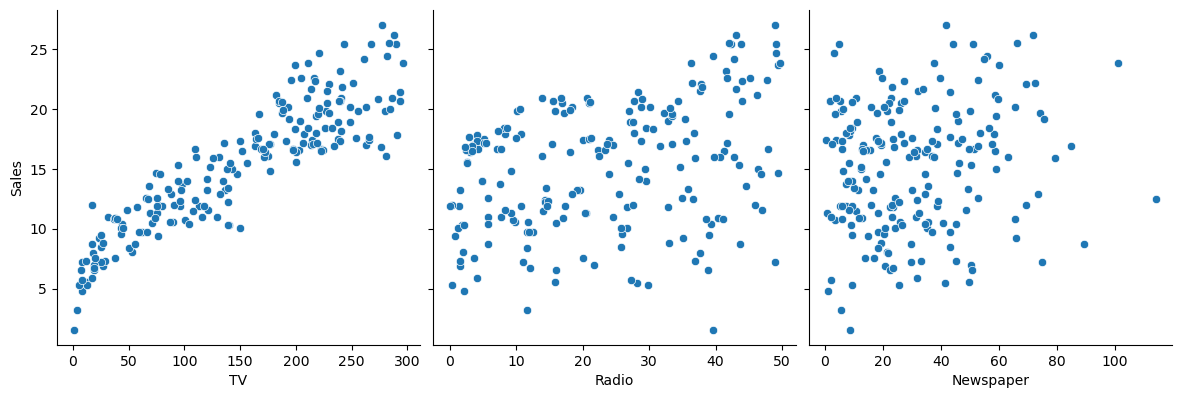

In [7]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

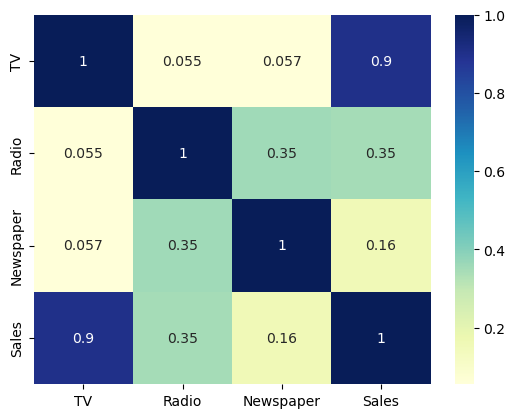

In [8]:
# Visualizing the data using heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

## LR Model

In [9]:
# Creating X and y
X = advertising['TV']
y = advertising['Sales']

In [10]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [11]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [12]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [13]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


## Predict

In [14]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

## Evaluate

In [16]:
# Importing r2_square
from sklearn.metrics import r2_score

# Comparing the r2 value of both train and test data
print(r2_score(y_train_lm,y_train_pred))
print(r2_score(y_test_lm,y_test_pred))

0.8157933136480389
0.7921031601245662


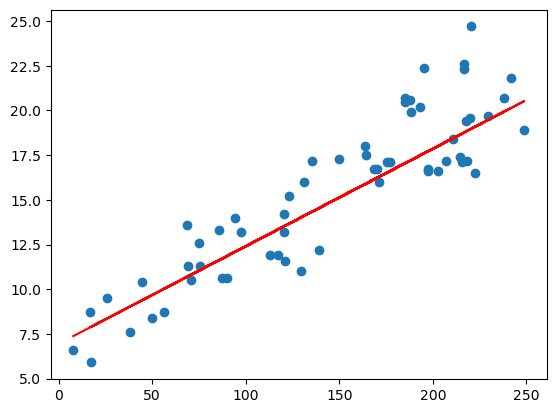

In [19]:
# Visualize the line on the test set
plt.scatter(X_test_lm, y_test_lm)
plt.plot(X_test_lm, y_test_pred, 'r')
plt.show()

# Linear Regression with Execution Graph

In [20]:
%load_ext autoreload
%autoreload 2

In [21]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [22]:
train_csv = pd.concat([X_train_lm,y_train_lm], axis=1)
test_csv = X_test_lm
test_csv_labels = y_test_lm

In [23]:
import os
if not os.path.exists('./lr_data/final'):
    os.mkdir('./lr_data/final')

train_csv.to_csv('./lr_data/final/train.csv', index=False)
test_csv.to_csv('./lr_data/final/test.csv', index=False)

test_csv_labels.to_csv('./lr_data/final/test_labels.csv', index=False)

## Start Environment

In [24]:
from experiment_graph.execution_environment import ExecutionEnvironment

In [25]:
execution_environment = ExecutionEnvironment()
root_data = './lr_data/final'

## Load Data

In [26]:
train = execution_environment.load(root_data + '/train.csv')
print('Training data shape: ', train.shape().data())
# train.head().data()

test = execution_environment.load(root_data + '/test.csv')
print('Testing data shape: ', test.shape().data())
# test.head().data()

test_labels = execution_environment.load(root_data + '/test_labels.csv')
print('Testing lables shape: ', test_labels.shape().data())
# test_labels.head().data()

creating a new root node
Training data shape:  (140, 2)
creating a new root node
Testing data shape:  (60, 1)
creating a new root node
Testing lables shape:  (60, 1)


## EDA

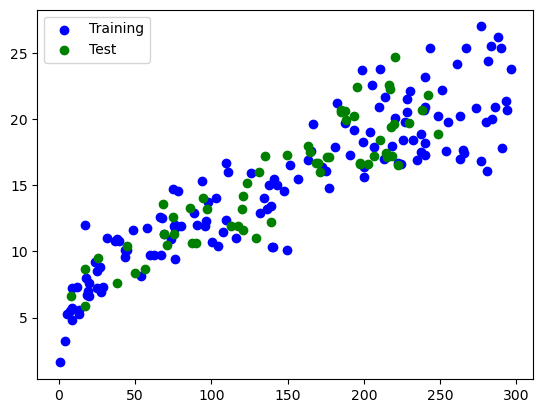

In [27]:
plt.scatter(train['TV'].data(), train['Sales'].data(), c = 'b', label = "Training")
plt.scatter(test['TV'].data(), test_labels['Sales'].data(), c = 'g', label = "Test")
plt.legend()
plt.show()

## LR Model

In [28]:
from experiment_graph.sklearn_helper.linear_model import LinearRegression

In [29]:
# from sklearn.linear_model import LinearRegression

# # Creating an object of Linear Regression
# lm = LinearRegression()

# # Fit the model using .fit() method
# lm.fit(X_train_lm, y_train_lm)

lm = LinearRegression()

train_labels = train['Sales']
train_data = train.drop(columns=['Sales'])

# Train on the training data
lm.fit(train_data, train_labels)

## Predict

In [30]:
# # Making Predictions of y_value
# y_train_pred = lm.predict(X_train_lm)
# y_test_pred = lm.predict(X_test_lm)
y_train_pred = lm.predict(train_data)
y_test_pred = lm.predict(test)

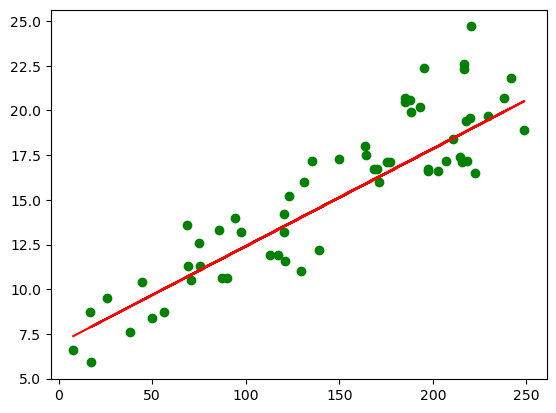

In [31]:
# Visualize the line on the test set
plt.scatter(test.data(), test_labels['Sales'].data(), c = 'g')
plt.plot(list(test.data()['TV']), list(y_test_pred.data()[0]), 'r')
plt.show()

## Evaluate

In [32]:
score = lm.score(train_data,
                 train_labels,
                 score_type='r2').data()
print('Linear Regression with Train R2 score: {}'.format(score))

score = lm.score(test,
                 test_labels['Sales'],
                 score_type='r2').data()
print('Linear Regression with Test R2 score: {}'.format(score))

Linear Regression with Train R2 score: {'r2': 0.8157933136480389}
Linear Regression with Test R2 score: {'r2': 0.7921031601245662}


## WorkloadDAG

In [71]:
import copy
from collections import deque
from datetime import datetime

import networkx as nx
import numpy as np

# Reserved word for representing super graph.
# Do not use combine as an operation name
# TODO: make file with all the global names
from experiment_graph.graph.auxilary import DataFrame, DataSeries
from experiment_graph.data_storage import SimpleStorageManager
from experiment_graph.globals import COMBINE_OPERATION_IDENTIFIER

def plot_graph_input(graph_input, plt, figsize=(12, 12), labels_for_vertex=['size'], labels_for_edges=['name'], vertex_size=1000,
                   vertex_font_size=10):
        """
        plot the graph using the graphvix dot layout
        :param vertex_font_size:
        :param vertex_size:
        :param labels_for_edges:
        :param labels_for_vertex:
        :param figsize: size of the figure (default (12,12))
        :param plt: matlibplot object
        """
        from networkx.drawing.nx_agraph import graphviz_layout
        f = plt.figure(figsize=figsize)
        ax = f.add_subplot(1, 1, 1)
        pos = graphviz_layout(graph_input.graph, prog='dot', args='')

        # get the list of available types and frequency of each node
        vertex_labels = {}
        unique_types = []

        for node in graph_input.graph.nodes(data=True):
            if node[1]['type'] not in unique_types:
                unique_types.append(node[1]['type'])
            labels = []
            for p in labels_for_vertex:

                if p == 'id':
                    if node[1]['root']:
                        labels.append('root')
                    else:
                        labels.append(node[0][:10])
                if p not in node[1]:
                    labels.append('-')
                elif type(node[1][p]) is np.float64 or type(node[1][p]) is float:
                    labels.append('{:.3f}'.format(node[1][p]))
                else:
                    labels.append(str(node[1][p]))

            vertex_labels[node[0]] = ','.join(labels)

        jet = plt.get_cmap('gist_rainbow')
        colors = jet(np.linspace(0, 1, len(unique_types)))
        color_map = dict(zip(unique_types, colors))
        for label in color_map:
            ax.scatter(None, None, color=color_map[label], label=label)

        # TODO there's a problem with nodelist=...., the node type and legends dont match
        # materialized_nodes = [n[0] for n in graph_input.graph.node(data='mat') if n[1]]
        materialized_nodes = [n[0] for n in graph_input.graph.nodes(data='mat') if n[1]]
        # all_colors = [color_map[n[1]['type']] for n in graph_input.graph.nodes(data=True) if n[1]['mat']]
        all_colors = [color_map[n[1]['type']] for n in graph_input.graph.nodes(data=True) if 'mat' in n[1]]
        nx.draw_networkx(
            graph_input.graph,
            node_size=vertex_size,
            nodelist=materialized_nodes,
            cmap=jet,
            # vmin=0,
            # vmax=len(unique_types),
            node_color=all_colors,
            node_shape='s',
            pos=pos,
            with_labels=False,
            ax=ax)

        # non_materialized_nodes = [n[0] for n in graph_input.graph.node(data='mat') if not n[1]]
        non_materialized_nodes = [n[0] for n in graph_input.graph.nodes(data='mat') if not n[1]]
        # all_colors = [color_map[n[1]['type']] for n in graph_input.graph.nodes(data=True) if not n[1]['mat']]
        all_colors = [color_map[n[1]['type']] for n in graph_input.graph.nodes(data=True) if 'mat' not in n[1]]
        nx.draw_networkx(
            graph_input.graph,
            edgelist=[],
            node_size=vertex_size,
            nodelist=non_materialized_nodes,
            cmap=jet,
            # vmin=0,
            # vmax=len(unique_types),
            node_color=all_colors,
            node_shape='o',
            pos=pos,
            with_labels=False,
            ax=ax)

        if labels_for_vertex:
            nx.draw_networkx_labels(graph_input.graph,
                                    pos=pos,
                                    labels=vertex_labels,
                                    font_size=vertex_font_size)

        def construct_label(edge_data, edge_labels):
            return ','.join(['' if str(edge_data[l]) == 'combine' else str(edge_data[l]) for l in edge_labels])

        nx.draw_networkx_edge_labels(
            graph_input.graph,
            pos=pos,
            edge_labels={(u, v): construct_label(d, labels_for_edges) for u, v, d in graph_input.graph.edges(data=True)})

        plt.axis('off')
        f.set_facecolor('w')
        leg = ax.legend(markerscale=3, loc='best', fontsize=12, scatterpoints=1, labelspacing=1.5)

        for line in leg.get_lines():
            line.set_linewidth(4.0)


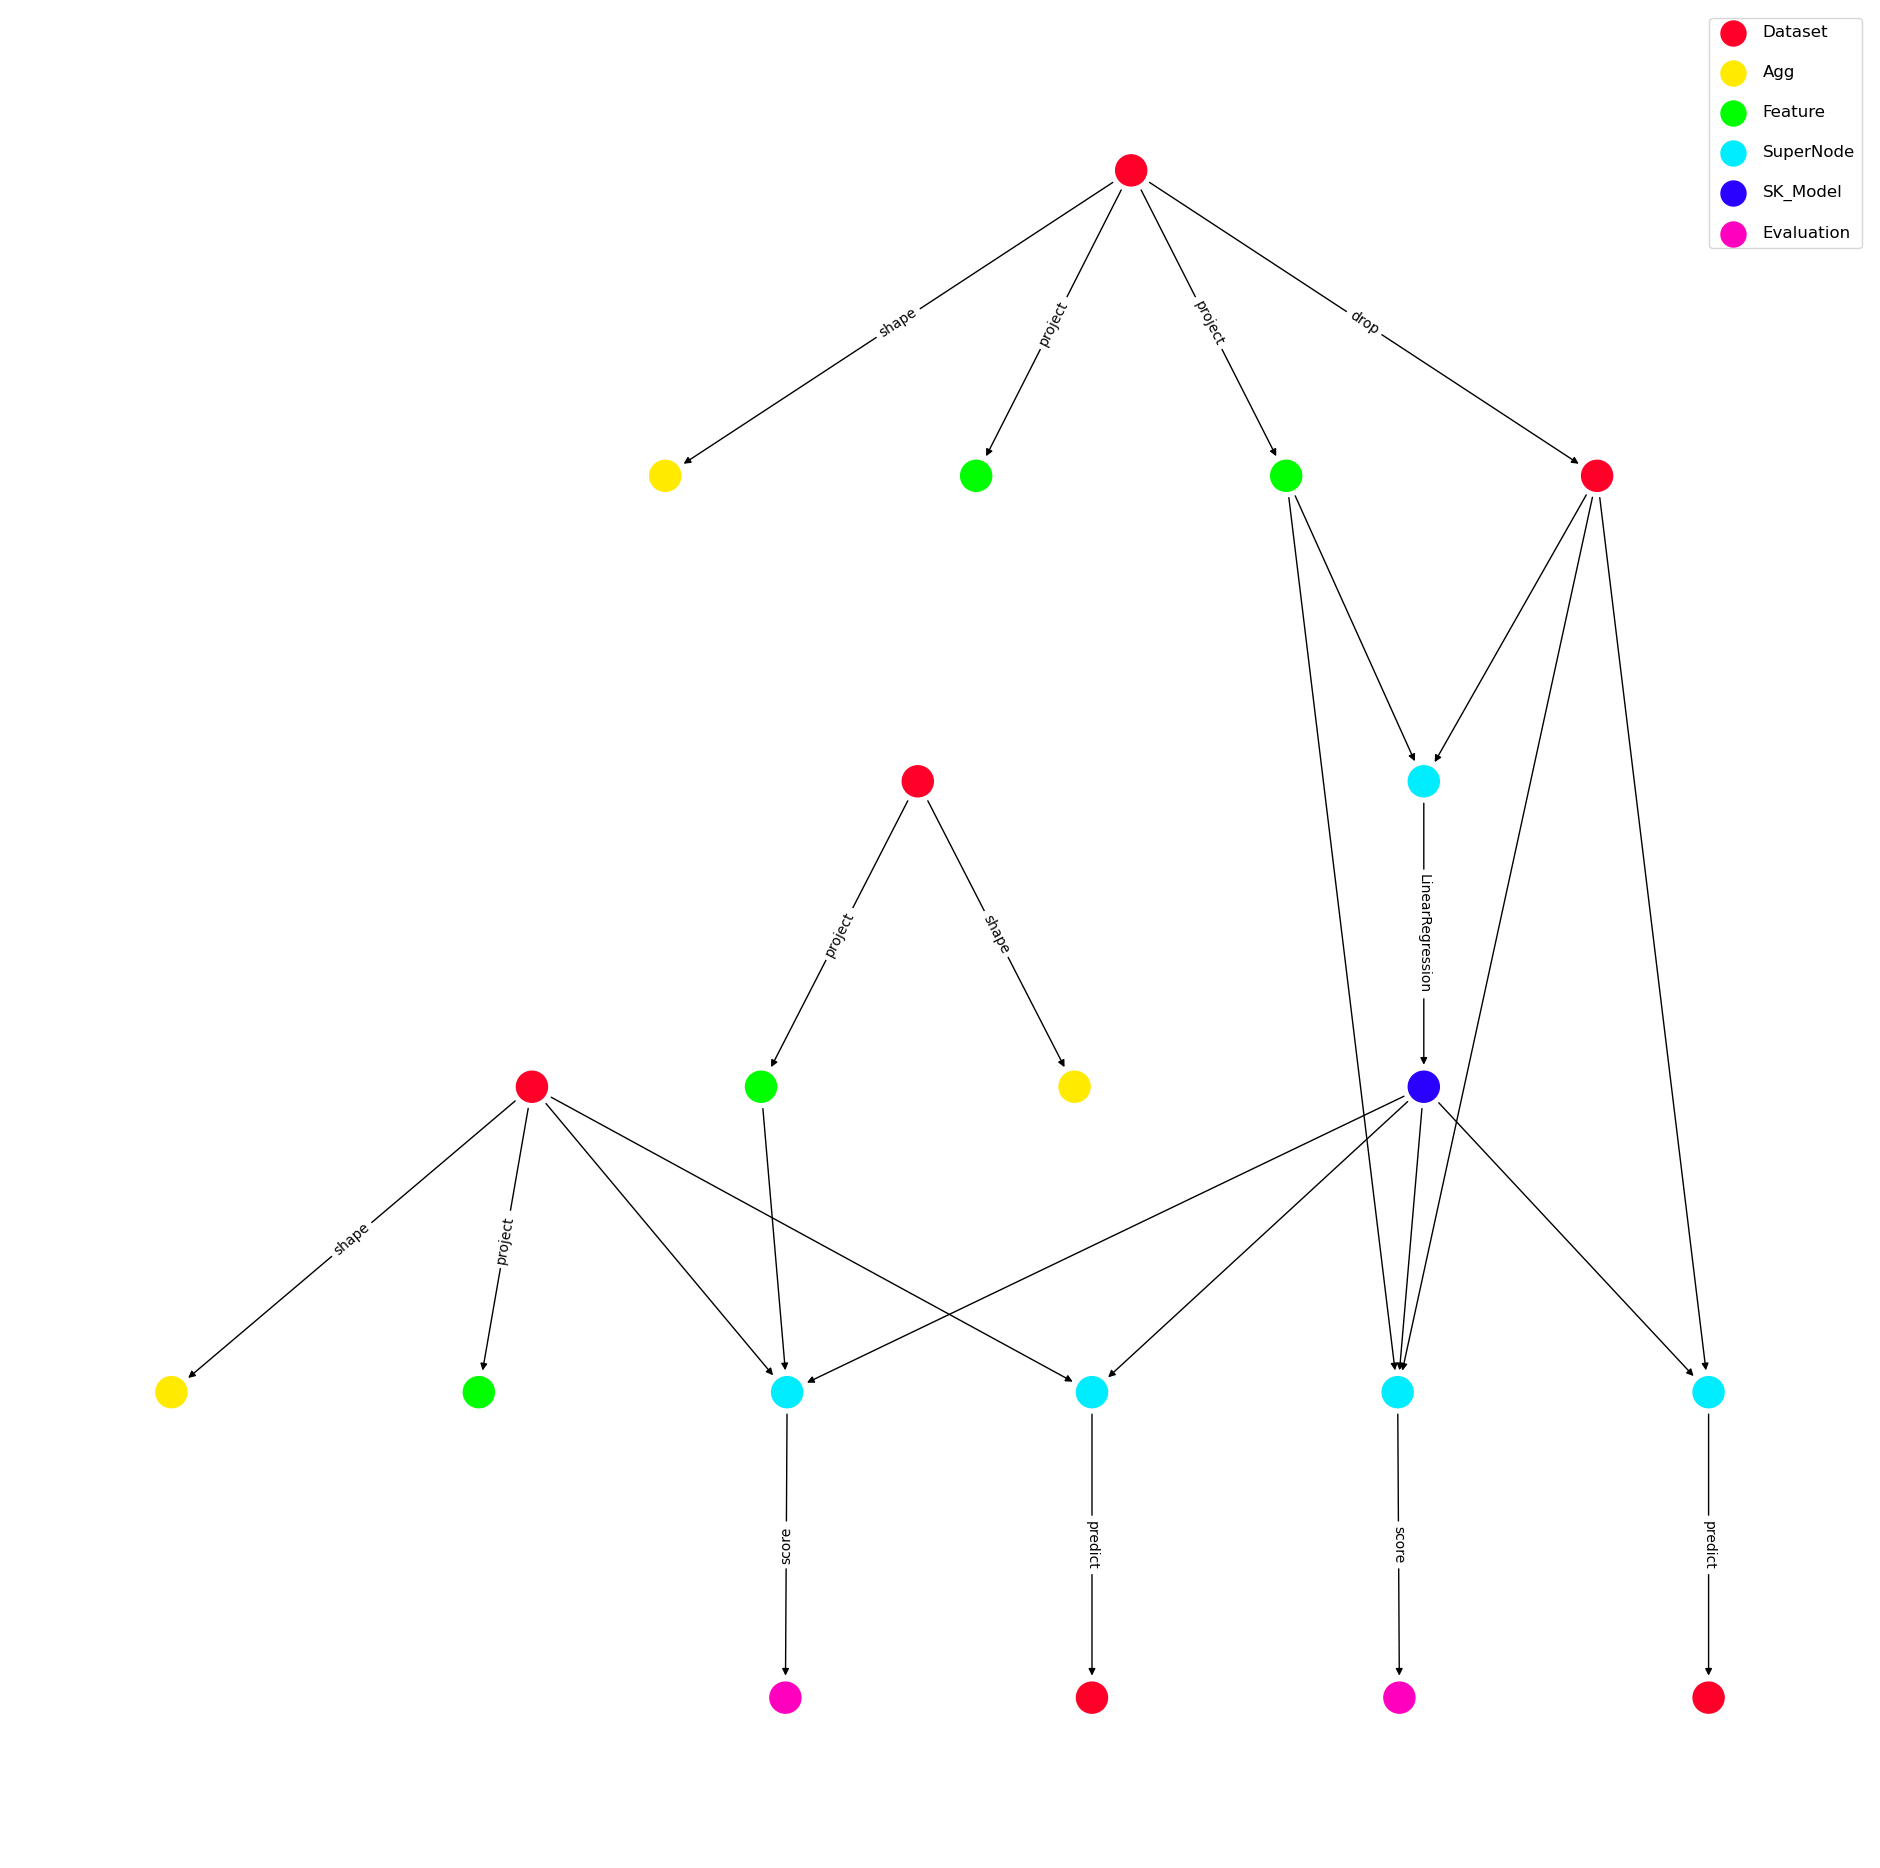

In [221]:
plot_graph_input(execution_environment.workload_dag, 
                 plt, 
                 vertex_size=500, 
                 figsize=(24, 24), 
                 vertex_font_size=10, 
                 labels_for_vertex = [])

In [76]:
import plotly.graph_objects as go

In [77]:
G = execution_environment.workload_dag.graph

In [95]:
# Get positions for the nodes in G
# pos_ = nx.spring_layout(G)

from networkx.drawing.nx_agraph import graphviz_layout
pos_ = graphviz_layout(G, prog='dot', args='')

In [140]:
# Custom function to create an edge between node x and node y, with a given text and width
def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')
def make_edge_text(x, y, text, width):
    return  go.Scatter(x            = x,
                       y            = y,
                       textposition ='bottom center',
                       hoverinfo    = 'text',
                       text         = ([text]),
                       mode         = 'text')

In [207]:
# For each edge, make an edge_trace, append to list
edge_trace = []
for edge in G.edges(data=True):
    x0, y0 = pos_[edge[0]]
    x1, y1 = pos_[edge[1]]
    text   = str(edge[2]['name'])
    trace  = make_edge([x0, x1, None],
                       [y0, y1, None],
                       text,
                       width = 1)
    edge_trace.append(trace)

edge_text_trace = []
for edge in G.edges(data=True):
    x0, y0 = pos_[edge[0]]
    x1, y1 = pos_[edge[1]]
    text   = str(edge[2]['name'])
    trace  = make_edge_text([(x0+x1)/2, x1, None],
                       [(y0+y1)/2, y1, None],
                       text,
                       width = 1)
    edge_text_trace.append(trace)

In [208]:
unique_types = []
for node in G.nodes(data=True):
    if node[1]['type'] not in unique_types:
        unique_types.append(node[1]['type'])
labels = []
jet = plt.get_cmap('gist_rainbow')
colors = jet(np.linspace(0, 1, len(unique_types)))
color_map = dict(zip(unique_types, colors))
# color_map

In [209]:
# Make a node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 10,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(
#                                         showscale=True,
                                        # colorscale options
                                        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
                                        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
                                        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
                                        colorscale='YlGnBu',
                                        reversescale=True,
                                        color=[],
                                        size=10,
#                                         colorbar=dict(
#                                             thickness=15,
#                                             title='Node Connections',
#                                             xanchor='left',
#                                             titleside='right'
#                                         ),
                                        line_width=2)
#                                     dict(
#                                         color = [],
#                                         size  = [],
#                                         line  = None)
                       )
# For each node in midsummer, get the position and size and add to the node_trace
for node in G.nodes(data=True):
#     print(node)
    x, y = pos_[node[0]]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['marker']['size'] += 0.5#tuple([10])
#     node_trace['text'] += tuple(['<b>' + node + '</b>'])

In [217]:
# Customize layout
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': True}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': True}, # no gridlines
)
# Create figure
fig = go.Figure(layout = layout)
# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
# Add all edge text traces
for trace in edge_text_trace:
    fig.add_trace(trace)
# Add node trace
fig.add_trace(node_trace)
# Remove legend
fig.update_layout(showlegend = False)
# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
# Show figure
fig.show()

In [36]:
list(execution_environment.workload_dag.graph.nodes(data=True))

[('train.csv{}',
  {'root': True,
   'type': 'Dataset',
   'data': <experiment_graph.graph.node.Dataset at 0x7fd350991160>,
   'loc': './lr_data/final/train.csv',
   'extra_params': {},
   'size': None}),
 ('595CAA1A74E9B72C801C6896EB068148',
  {'type': 'Agg',
   'root': False,
   'data': <experiment_graph.graph.node.Agg at 0x7fd350991040>,
   'size': 0.0}),
 ('test.csv{}',
  {'root': True,
   'type': 'Dataset',
   'data': <experiment_graph.graph.node.Dataset at 0x7fd350991970>,
   'loc': './lr_data/final/test.csv',
   'extra_params': {},
   'size': None}),
 ('F6C19391A143357B6F7A255F62B7E2D3',
  {'type': 'Agg',
   'root': False,
   'data': <experiment_graph.graph.node.Agg at 0x7fd350980700>,
   'size': 0.0}),
 ('test_labels.csv{}',
  {'root': True,
   'type': 'Dataset',
   'data': <experiment_graph.graph.node.Dataset at 0x7fd3509919a0>,
   'loc': './lr_data/final/test_labels.csv',
   'extra_params': {},
   'size': None}),
 ('517FFCDAF1BDD0A3141FECA7AE09569F',
  {'type': 'Agg',
   'roo

In [80]:
G.nodes[edge[0]]

{'root': True,
 'type': 'Dataset',
 'data': <experiment_graph.graph.node.Dataset at 0x7fd350991160>,
 'loc': './lr_data/final/train.csv',
 'extra_params': {},
 'size': None}

In [88]:
for edge in G.edges(data=True):
    print(edge[2]['name'])

shape
project
project
drop
shape
project
combine
combine
shape
project
combine
combine
combine
combine
combine
combine
LinearRegression
combine
combine
combine
combine
predict
predict
score
score
